In [ ]:
# Bike Rental Demand Prediction: Data Visualization

# Purpose:
# - Visualize trends, patterns, and distributions in the bike sharing dataset
# - Explore relationships between features and the target variable (`count`)
# - Identify correlations and feature importance through plots and charts
# - Gain insights to guide feature engineering and model selection

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load training datasets
df=pd.read_csv('../data/train.csv')
df=df.drop(['casual', 'registered'], axis=1)

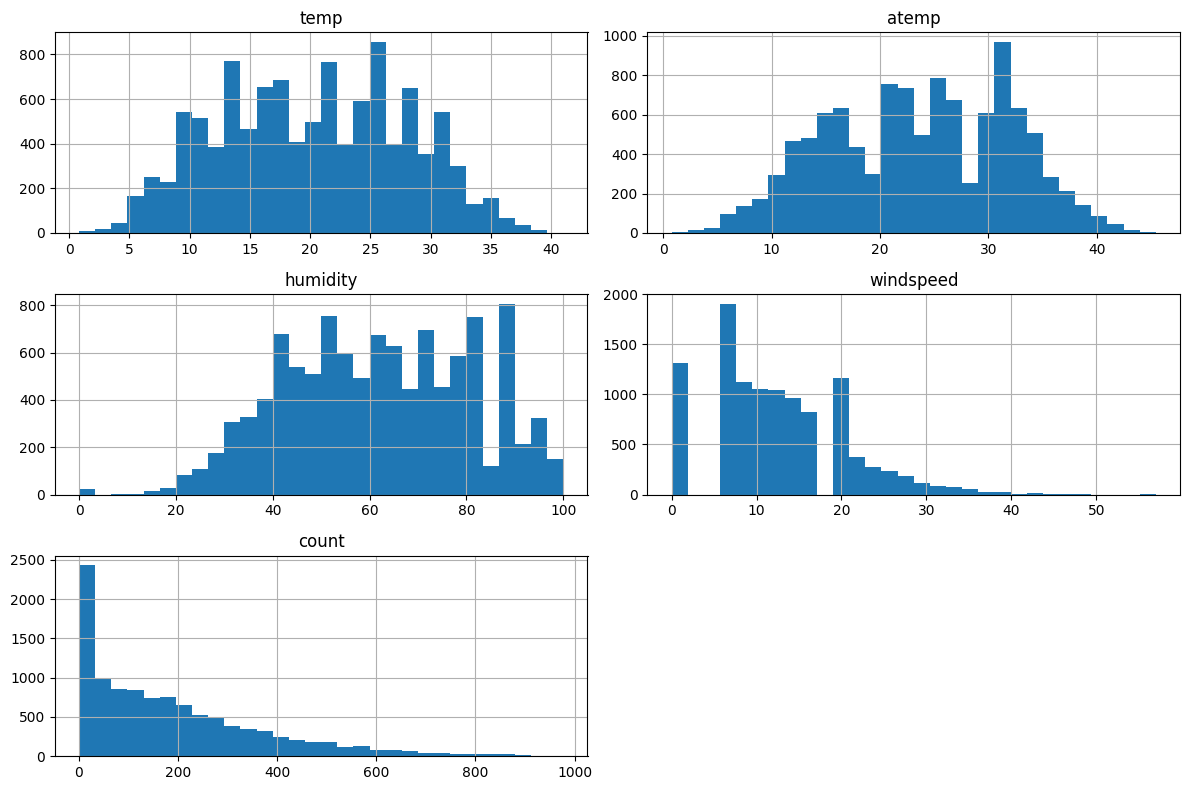

In [17]:
# Plotting histograms
num_cols=["temp", "atemp", "humidity", "windspeed", "count"]
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [18]:
# Histogram conclusions: 
# 1. temp and atemp both are approximately normally distributed, peaking in the 20-30 range
# 2. Humidity's distibution is relatively flat acccross range 40%-90%
# 3. Windspread's distribution is strongly right-skewed, somajority bike rentals are at very low wind-speeds 
# 4. The target variable is heavily right-skewed. Mostc ounts are very low (under 200), indicating the need of log transformation

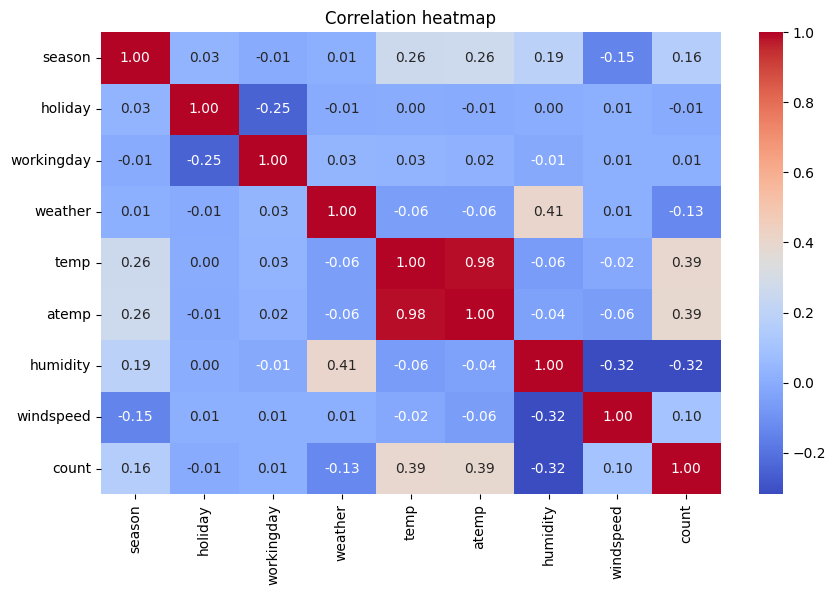

In [20]:
# Plotting correkation heaomap for the numeric columns
numeric_df=df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [21]:
# --- Correlation Analysis for Regression Modeling ---

# 1. Handling Multicollinearity:
#    # The correlation between 'temp' and 'atemp' is 0.98, indicating severe multicollinearity.
#    # Action: We will drop 'atemp' to ensure stable coefficients in the Linear/Polynomial Regression base model.

# 2. Key Predictors:
#    # The strongest linear drivers of 'count' are 'temp' (0.39) and 'humidity' (-0.32).
#    # We expect these features to receive high weights in all regression models.

# 3. Model Complexity and Regularization Plan:
#    # Since we will be creating many features using Polynomial Regression, and many base features have low correlation (e.g., 'holiday', 'workingday'),
#    # we anticipate overfitting. 
#    # Action: This confirms the necessity of applying Lasso (L1) and Ridge (L2) regularization to shrink coefficients and achieve the best final RMSE.